#### Scenario:
#### You are working as a data scientist for a healthcare analytics company. You have been
#### provided with a dataset containing anonymized patient data. Your task is to clean the data,
#### visualize it, analyze statistical relationships, and simulate a basic health-related system
#### using First Order ODEs.

In [4]:
import pandas as pd

In [6]:
data = pd.read_csv("patient_data.csv")

In [10]:
data.sample(10)

,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
88,89,Female,34,192.6,113.4,South,Medium
10,11,Male,27,202.9,113.3,East,Medium
86,87,Female,28,224.7,144.5,North,Medium
18,19,Female,64,200.2,120.9,South,Medium
51,52,Female,61,202.1,123.2,West,Low
63,64,Male,74,205.5,133.0,East,High
44,45,Female,36,217.6,112.9,West,Medium
40,41,Male,27,223.7,154.7,South,Low
59,60,Male,31,163.1,132.8,North,High
79,80,Female,20,219.7,131.6,East,Low


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         100 non-null    int64  
 1   Gender            100 non-null    object 
 2   Age               100 non-null    int64  
 3   CholesterolLevel  100 non-null    float64
 4   BloodPressure     100 non-null    float64
 5   Region            100 non-null    object 
 6   RiskCategory      100 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


## Q1: Outlier Detection and Feature Reduction (2 Marks)

### - Use VarianceThreshold to remove constant features (if any).
#### No constant features detected

In [16]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

data = pd.read_csv("patient_data.csv")

selector = VarianceThreshold(threshold=0)
df_vt = selector.fit_transform(data.select_dtypes(include=['number']))
data[data.columns[selector.get_support(indices=True)]]
selector.get_support()

array([ True,  True,  True,  True])

### - Detect and remove outliers from CholesterolLevel using any method of choice.

In [18]:
Q1 = data['CholesterolLevel'].quantile(0.25)
Q3 = data['CholesterolLevel'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['CholesterolLevel'] >= lower_bound) & (data['CholesterolLevel'] <= upper_bound)]

In [20]:
data

,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
0,1,Male,37,193.4,129.4,East,High
1,2,Female,45,210.7,107.1,West,Low
2,3,Male,63,244.3,103.9,West,Low
3,4,Male,53,184.5,127.2,West,High
4,5,Male,29,175.7,116.6,South,High
...,...,...,...,...,...,...,...
94,95,Female,51,208.3,105.3,East,Low
95,96,Female,58,224.8,126.9,East,High
96,97,Female,68,200.4,123.0,North,Medium
97,98,Female,71,243.6,111.0,West,Low


### - Replace any missing values.

In [22]:
data.isnull().sum()

PatientID           0
Gender              0
Age                 0
CholesterolLevel    0
BloodPressure       0
Region              0
RiskCategory        0
dtype: int64

## Q2: Data Visualization (2 Marks)

#### - Generate a box plot comparing BloodPressure between different RiskCategory levels

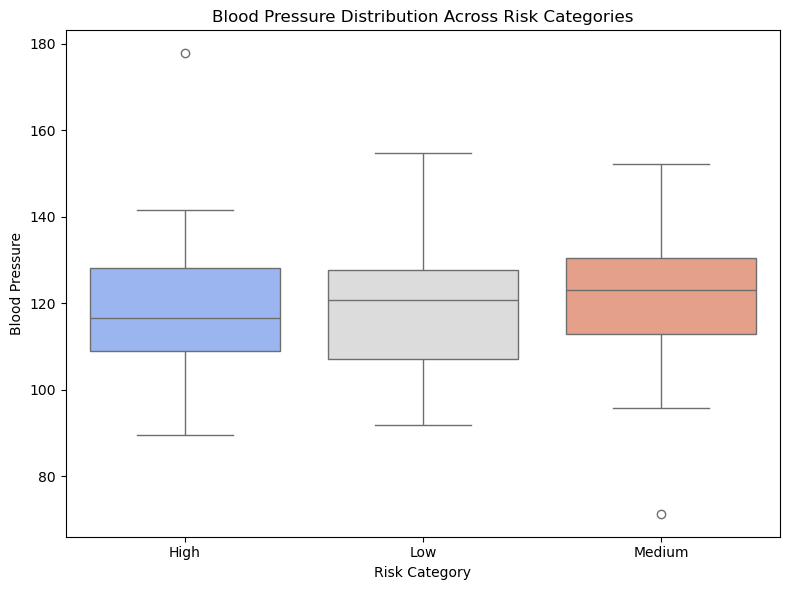

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="RiskCategory", y="BloodPressure", palette= "coolwarm", hue = "RiskCategory" )
plt.title("Blood Pressure Distribution Across Risk Categories")
plt.xlabel("Risk Category")
plt.ylabel("Blood Pressure")
plt.tight_layout()
plt.show()

### - Create a count plot showing the number of patients in each RiskCategory per Region.

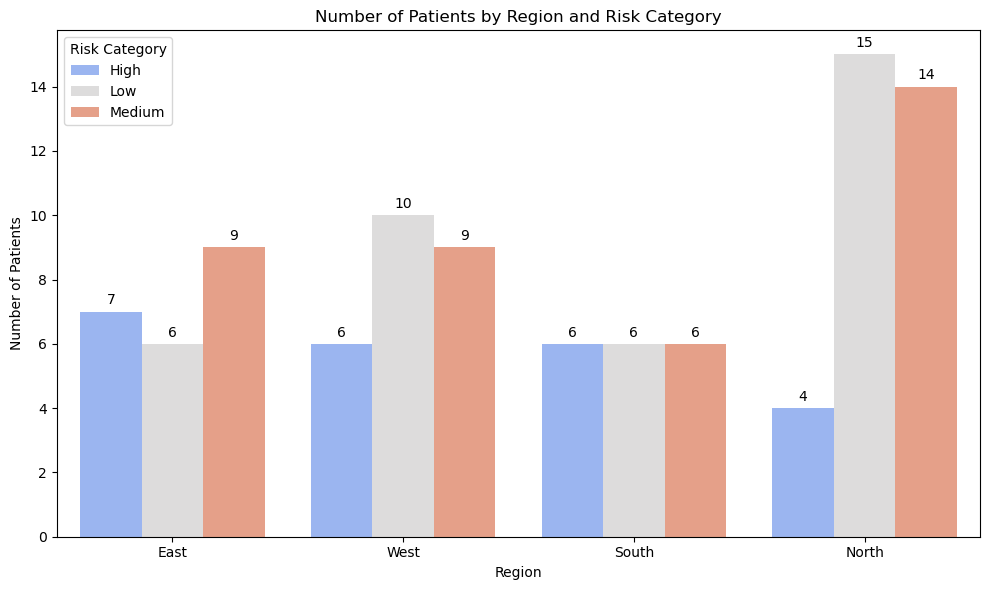

In [32]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x="Region", hue="RiskCategory", palette="coolwarm")
for container in ax.containers:
    ax.bar_label(container, label_type="edge", padding=3)
plt.title("Number of Patients by Region and Risk Category")
plt.xlabel("Region")
plt.ylabel("Number of Patients")
plt.legend(title="Risk Category")
plt.tight_layout()
plt.show()

## Q3: Statistical Hypothesis Testing (3 Marks)
#### Include:
#### - Null and alternative hypotheses
#### - Test statistic, p-value
#### - Your interpretation (reject/fail to reject H₀)

#### Perform the following:
#### - Is the average CholesterolLevel significantly different from 200 mg/dL having a sample
#### size of 20?

In [36]:
from scipy.stats import ttest_1samp

sample = data['CholesterolLevel'].sample(20, random_state=42)

# Hypotheses:
# H0: μ = 200
# H1: μ ≠ 200

t_val, p_val = ttest_1samp(sample, 200)
print(f"T-Statistic: {t_val}, P-value: {p_val}")

if p_val < 0.05:
    print("Reject H₀: Cholesterol level is significantly different from 200.")
else:
    print("Fail to reject H₀: No significant difference.")


T-Statistic: 1.1450268899426395, P-value: 0.2664172217167736
Fail to reject H₀: No significant difference.


#### - Is there a significant relationship between Region and RiskCategory?

In [40]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(data['Region'], data['RiskCategory'])
chi2, p, dof, _ = chi2_contingency(contingency)

print(f"Chi2: {chi2}, P-value: {p}, DOF: {dof}")
if p < 0.05:
    print("Reject H₀: Region and RiskCategory are dependent.")
else:
    print("Fail to reject H₀: No significant relationship.")


Chi2: 4.8246822108149345, P-value: 0.5664877563797075, DOF: 6
Fail to reject H₀: No significant relationship.


#### Q4: Modeling a Health System with ODE (3 Marks)

#### Model the progression of a patient's medication in the bloodstream.
#### Equation:
####  dC/dt = k(D - C)
#### Where:
#### - k = 0.1, D = 100, C(0) = 0
#### 1) - Solve this ODE for t = 0 to 50 using both odeint and solve_ivp
#### 2) - Plot the result and explain the difference in output between the two solvers, if any.

## SOLVE WITH ODEINT

In [42]:
import numpy as np
from scipy.integrate import odeint

def model(C, t, k, D):
    return k * (D - C)

t = np.linspace(0, 50, 500)
C0 = 0
k = 0.1
D = 100

C_odeint = odeint(model, C0, t, args=(k, D))
C_odeint

array([[ 0.        ],
       [ 0.99700069],
       [ 1.98406126],
       [ 2.96128083],
       [ 3.92875751],
       [ 4.88658844],
       [ 5.8348698 ],
       [ 6.77369678],
       [ 7.70316365],
       [ 8.62336373],
       [ 9.53438941],
       [10.43633215],
       [11.32928252],
       [12.21333017],
       [13.08856385],
       [13.95507144],
       [14.81293995],
       [15.66225551],
       [16.50310339],
       [17.33556802],
       [18.15973296],
       [18.97568098],
       [19.78349398],
       [20.58325309],
       [21.37503859],
       [22.15892999],
       [22.93500599],
       [23.7033445 ],
       [24.46402268],
       [25.21711689],
       [25.96270274],
       [26.7008551 ],
       [27.43164807],
       [28.15515503],
       [28.87144861],
       [29.58060075],
       [30.28268264],
       [30.97776476],
       [31.66591691],
       [32.34720818],
       [33.02170697],
       [33.68948101],
       [34.35059733],
       [35.00512232],
       [35.65312169],
       [36

## SOLVE WITH SOLVE_IVP

In [44]:
from scipy.integrate import solve_ivp

def model_ivp(t, C):
    return k * (D - C)

sol_ivp = solve_ivp(model_ivp, [0, 50], [0], t_eval=t)
sol_ivp

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.002e-01 ...  4.990e+01  5.000e+01]
        y: [[ 0.000e+00  9.970e-01 ...  9.931e+01  9.931e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 62
     njev: 0
      nlu: 0

## VISUALIZATION OF BOTH OUTPUTS

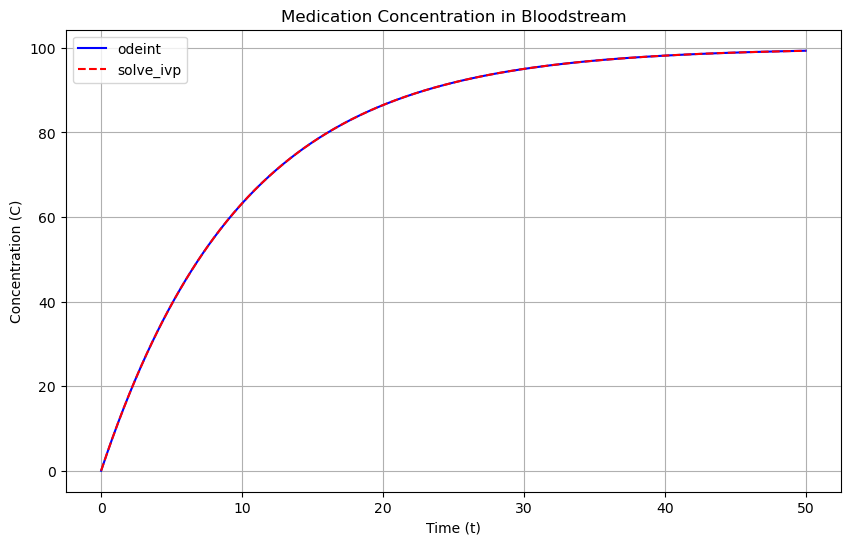

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(t, C_odeint, label="odeint", color='blue')

plt.plot(sol_ivp.t, sol_ivp.y[0], '--', label="solve_ivp", color='red')

plt.xlabel("Time (t)")
plt.ylabel("Concentration (C)")
plt.title("Medication Concentration in Bloodstream")
plt.legend()
plt.grid()
plt.show()